<a href="https://colab.research.google.com/github/Subhasishbasak/Data-Mining-Machine-Learning/blob/master/Image_pyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer_vision/Assignment_2/MDS201803

### Basic imports

In [0]:
import numpy as np
from PIL import Image
from cv2 import filter2D
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2

### (Q.1)

### Code for printing the images:

In [0]:
def print_image_outline( npdata ):
    img = Image.fromarray(np.asarray( np.clip(npdata,0,255), dtype="uint8"))
    %matplotlib inline
    return img.show()
    
def print_image_inline( npdata ):
    plt.figure(figsize = (20,6))
    return plt.imshow(npdata, cmap = 'gray')

### Loading the Image

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/parrot.png' )
data = np.array( image )

### Function for down-sampling

In [0]:
def down_sample(input_file, kernel, pyramid_len = 3, output = True):
    
    # Creating the kernel:
    # Here the kernel_vector should be the row/column corresponding the separable filter
    
    kernel_vector = np.array(kernel)
    kernel = np.outer(kernel_vector.ravel(), kernel_vector.ravel())
    
    # image_list stores the downsampled images 
    
    image_list = [input_file]
    
    image = input_file
    
    for i in range(0,pyramid_len):
        
        # Convoluting the image with the kernel with inbuilt function "filter2D"
    
        convoluted = filter2D(image, -1, kernel)
        
        # The convoluted image is down-sampled by deleting even rows & columns
        
        down_sampled = convoluted[0::2,0::2]
        
        # The processed image is stored as the new image for furthur processing
        
        image = down_sampled
        
        # To zoom out the images (for printing purposes) we use constant padding of appropriate width
    
        pad_height_top = (input_file.shape[0] - image.shape[0])//2
        pad_height_bottom = (input_file.shape[0] - image.shape[0])//2
        pad_width_left = 0
        pad_width_right = 0
        
        padded_im = cv2.copyMakeBorder(image, pad_height_top, pad_height_bottom, pad_width_left, pad_width_right, cv2.BORDER_CONSTANT, value = (255,255,255))

        # Appending the downsampled padded image to image_list

        image_list.append(padded_im)
    
    if output:
        return image_list
    else:
        return image
    

In [0]:
def build_pyarmid(input_file, kernel, pyramid_len = 3):
    
    # Concatenate the images to build the pyramid using CV2's inbuilt function
    # The function "hconcat_resize_min" concatenates all the images 
    
    def hconcat(im_list, interpolation=cv2.INTER_CUBIC):
        h_min = min(im.shape[0] for im in im_list)
        im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                          for im in im_list]
        return cv2.hconcat(im_list_resize)
    
    image_list = down_sample(input_file, kernel, pyramid_len , output = True)
    
    return hconcat(image_list)

### Building the pyramid

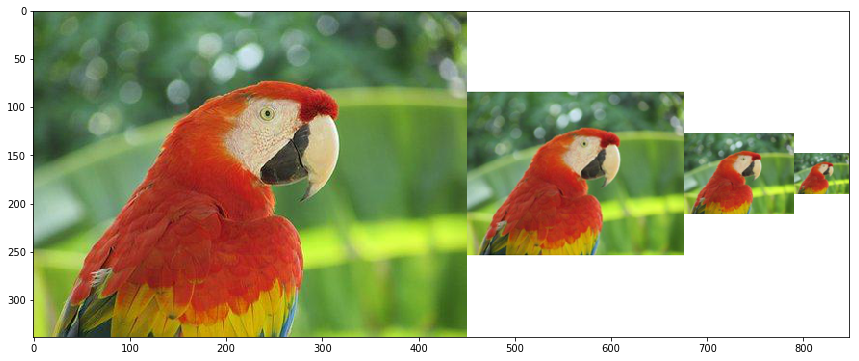

In [0]:
print_image_inline(build_pyarmid(data, [1/3,1/3,1/3], 3))

### (Q.2)

#### We build Gaussian pyramids with $5 \times 5$ window

### Loading the Image

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/lena.png' )
data = np.array( image )

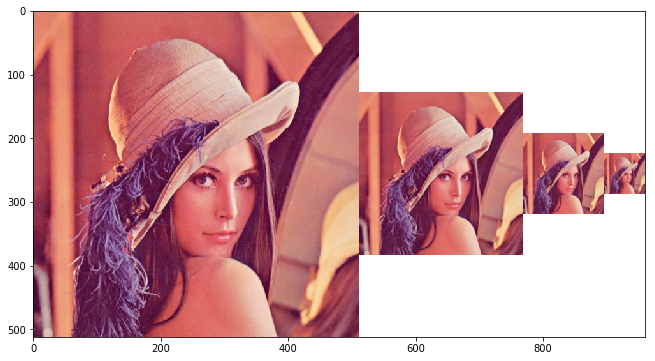

In [0]:
print_image_inline(build_pyarmid(data, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.3)

#### Building Gaussian pyramids for Grayscale image

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/cameraman.jpg' )
data = np.array( image )

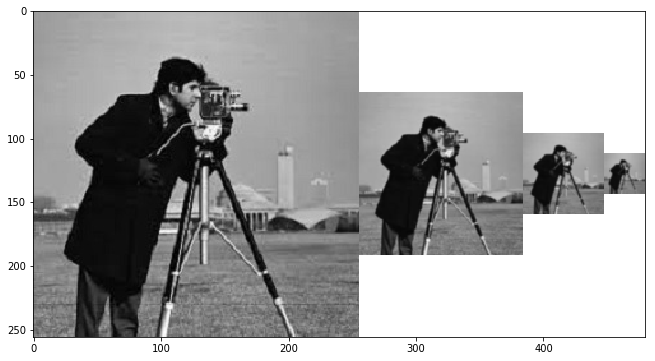

In [0]:
print_image_inline(build_pyarmid(data, [1/16,4/16,6/16,4/16,1/16], 3))

#### Building Gaussian pyramids for Colour image

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/parrot.png' )
data = np.array( image )

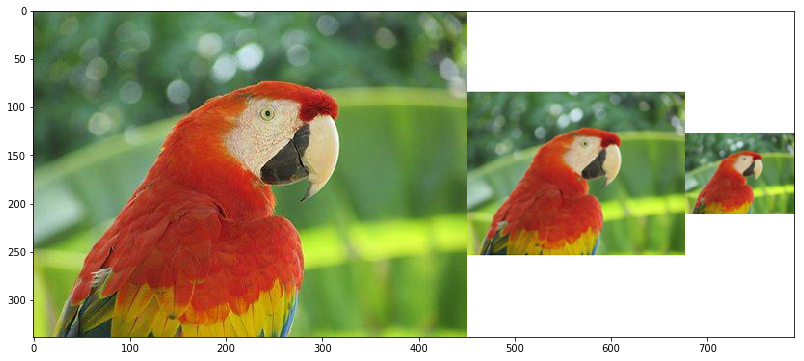

In [0]:
print_image_inline(build_pyarmid(data, [1/16,4/16,6/16,4/16,1/16], 2))

### (Q.4)

### Function for up-sampling

In [0]:
def up_sample(input_file, kernel, pyramid_len, output = True):
    
    # Creating the kernel:
    # Here the kernel_vector should be the row/column corresponding the separable filter
    
    kernel_vector = np.array(kernel)
    kernel = np.outer(kernel_vector.ravel(), kernel_vector.ravel())
    
    # image_list stores the downsampled images 
    
    image_list = []
    
    # We define a function a "add_rows", it adds a zero row after eah alternate position
    
    def add_rows(matrix, rows):
        
        for i in range(0, rows):
            
            first = np.insert(matrix, 2*i+1, 0, axis = 1) 
            matrix = first
            
        return matrix   
            
    # We define a function a "add_cols", it adds a zero column after eah alternate position
        
    def add_cols(matrix, cols):
        
        for i in range(0, cols):
            
            first = np.insert(matrix, 2*i+1, 0, axis = 0) 
            matrix = first
            
        return matrix   
            
    # Now for the input image we add alternate rows and columns to up sample it for each of its dimensions
    
    def add_rows_columns(input_file):
        
        # "n_rows" and "n_cols" are the number of rows/cols to be upsampled

        n_rows = input_file.shape[0]
        n_cols = input_file.shape[1]

        # The following condition checks whether the image is grayscale or coloured and upscales accordingly

        if len(input_file.shape) != 2:

            r, g, b    = input_file[:, :, 0], input_file[:, :, 1], input_file[:, :, 2]
            r_up_sampled = add_cols(add_rows(r, n_cols), n_rows)
            g_up_sampled = add_cols(add_rows(g, n_cols), n_rows)
            b_up_sampled = add_cols(add_rows(b, n_cols), n_rows)
            up_sampled_image = np.dstack((r_up_sampled, g_up_sampled, b_up_sampled))

        else:

            up_sampled_image = add_rows(add_cols(input_file, n_rows), n_cols)
        
        return up_sampled_image

        
    image = input_file
    
    for i in range(0,pyramid_len):
        
        # To zoom out the images (for printing purposes) we use constant padding of appropriate width
    
        pad_height_top = (input_file.shape[0]*(2**pyramid_len) - image.shape[0])//2
        pad_height_bottom = (input_file.shape[0]*(2**pyramid_len) - image.shape[0])//2
        pad_width_left = 0
        pad_width_right = 0
        
        padded_im = cv2.copyMakeBorder(image, pad_height_top, pad_height_bottom, pad_width_left, pad_width_right, cv2.BORDER_CONSTANT, value = (255,255,255))

        # Appending the downsampled padded image to image_list

        image_list.append(padded_im)
        
        # The input image is up-sampled by adding even rows & columns
        
        up_sampled = add_rows_columns(image)
        
        # Convoluting the up-sampled image with the kernel with inbuilt function 
    
        convoluted = filter2D(up_sampled, -1, kernel)
        
        # The processed image is stored as the new image for furthur processing
        
        # Simple scaling is used to enhance the brightness of the image
        
        image = convoluted*4
        
    image_list.append(image)
    
    if output:
        return image_list
    else:
        return image
    

In [0]:
def build_pyarmid_up(input_file, kernel, pyramid_len = 3):
    
    # Concatenate the images to build the pyramid using CV2's inbuilt function
    # The function "hconcat_resize_min" concatenates all the images 
    
    def hconcat(im_list, interpolation=cv2.INTER_CUBIC):
        h_min = min(im.shape[0] for im in im_list)
        im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                          for im in im_list]
        return cv2.hconcat(im_list_resize)
    
    image_list = up_sample(input_file, kernel, pyramid_len, output = True)
    
    return hconcat(image_list)

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/hill_gray.png' )
data = np.array( image )

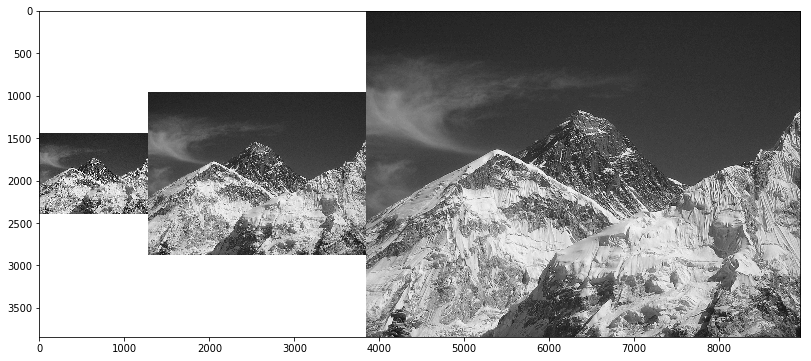

In [0]:
print_image_inline(build_pyarmid_up(data, [1/16,4/16,6/16,4/16,1/16], 2))

### (Q.5)

In [0]:
# Function for resizing the images while substracting
# This is required for solving the padding issues for images with odd 
def resize_n_pad(im1,im2):
            
    if im1.shape[0] != im2.shape[0] and im1.shape[1] == im2.shape[1]:
        
        if im1.shape[0] < im2.shape[0]:
            im1 = cv2.copyMakeBorder(im1, 1, 0, 0, 0, cv2.BORDER_REPLICATE, value = (255,255,255))
        else:
            im2 = cv2.copyMakeBorder(im2, 1, 0, 0, 0, cv2.BORDER_REPLICATE, value = (255,255,255))

    elif im1.shape[1] != im2.shape[1] and im1.shape[0] == im2.shape[0]:
    
        if im1.shape[1] < im2.shape[1]:
            im1 = cv2.copyMakeBorder(im1, 0, 0, 1, 0, cv2.BORDER_REPLICATE, value = (255,255,255))
        else:
            im2 = cv2.copyMakeBorder(im2, 0, 0, 1, 0, cv2.BORDER_REPLICATE, value = (255,255,255))

    elif im1.shape[0] != im2.shape[0] and im1.shape[1] != im2.shape[1]:

        if im1.shape[1] < im2.shape[1]:
            im1 = cv2.copyMakeBorder(im1, 0, 0, 1, 0, cv2.BORDER_REPLICATE, value = (255,255,255))
        else:
            im2 = cv2.copyMakeBorder(im2, 0, 0, 1, 0, cv2.BORDER_REPLICATE, value = (255,255,255))
        if im1.shape[0] < im2.shape[0]:
            im1 = cv2.copyMakeBorder(im1, 1, 0, 0, 0, cv2.BORDER_REPLICATE, value = (255,255,255))
        else:
            im2 = cv2.copyMakeBorder(im2, 1, 0, 0, 0, cv2.BORDER_REPLICATE, value = (255,255,255))

    return [im1, im2]

In [0]:
def laplacian(input_file, kernel, pyramid_len, output = True):
    
    # Creating the kernel:
    # Here the kernel_vector should be the row/column corresponding the separable filter
    
    kernel_vector = np.array(kernel)
    kernel = np.outer(kernel_vector.ravel(), kernel_vector.ravel())
    
    # image_list stores the downsampled images 
    
    image_list = [input_file]
    
    image = input_file
    
    for i in range(0,pyramid_len):
        
        # The image is down-sampled using the "down_sample" function
        
        down_sampled = down_sample(image, kernel, 1, False)
        
        # The down sampled image is up-sampled using the "up_sample" function
        
        up_sampled = up_sample(down_sampled, kernel, 1, False)
        
        # Next we compute the Laplace residuals with appropriate padding (wherever required)
        
        if image.shape == up_sampled.shape :
            image_laplace = image - up_sampled
        else:
            image = resize_n_pad(image,up_sampled)[0]
            up_sampled = resize_n_pad(image,up_sampled)[1]
            image_laplace = image - up_sampled
            
        
        # The processed image is stored as the new image for furthur processing
        
        image = down_sampled
        
        # To zoom out the images (for printing purposes) we use constant padding of appropriate width
    
        pad_height_top = (input_file.shape[0] - image_laplace.shape[0])//2
        pad_height_bottom = (input_file.shape[0] - image_laplace.shape[0])//2
        pad_width_left = 0
        pad_width_right = 0
        
        try:
            padded_im = cv2.copyMakeBorder(image_laplace, pad_height_top, pad_height_bottom, pad_width_left, pad_width_right, cv2.BORDER_CONSTANT, value = (255,255,255))
        except Exception:
            padded_im = image_laplace
        # Appending the downsampled padded image to image_list

        image_list.append(padded_im)
    
    if output:
        return image_list
    else:
        return image_laplace

In [0]:
def build_pyarmid_laplace(input_file, kernel, pyramid_len = 3):
    
    # Concatenate the images to build the pyramid using CV2's inbuilt function
    # The function "hconcat_resize_min" concatenates all the images 
    
    def hconcat(im_list, interpolation=cv2.INTER_CUBIC):
        h_min = min(im.shape[0] for im in im_list)
        im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                          for im in im_list]
        return cv2.hconcat(im_list_resize)
    
    image_list = laplacian(input_file, kernel, pyramid_len, output = True)
    
    return hconcat(image_list)

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_1/Images/Images/einstein.jpg' )
data = np.array( image )

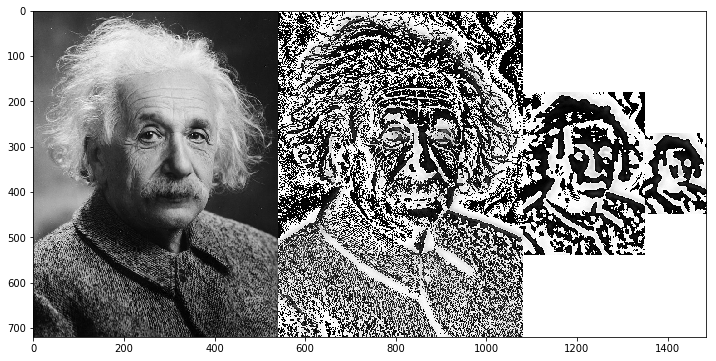

In [0]:
print_image_inline(build_pyarmid_laplace(data, [1/16,4/16,6/16,4/16,1/16], 3))

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/lena.png' )
data = np.array( image )

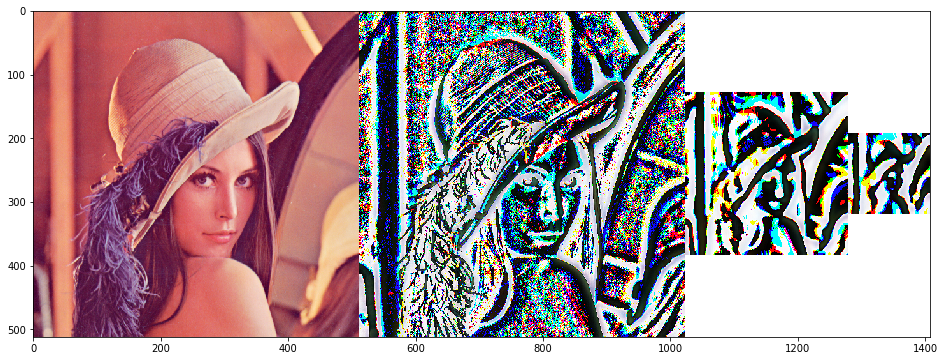

In [0]:
print_image_inline(build_pyarmid_laplace(data, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.6)

Laplacian Pyramids for the images from (Q.3)

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/cameraman.jpg' )
data = np.array( image )

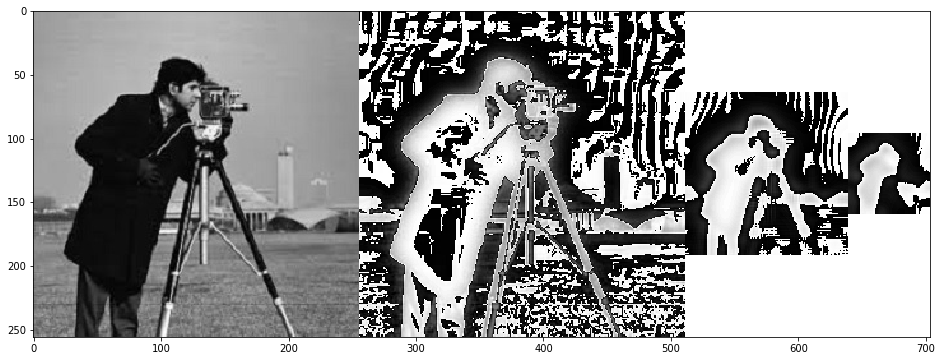

In [0]:
print_image_inline(build_pyarmid_laplace(data, [1/16,4/16,6/16,4/16,1/16], 3))

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/parrot.png' )
data = np.array( image )

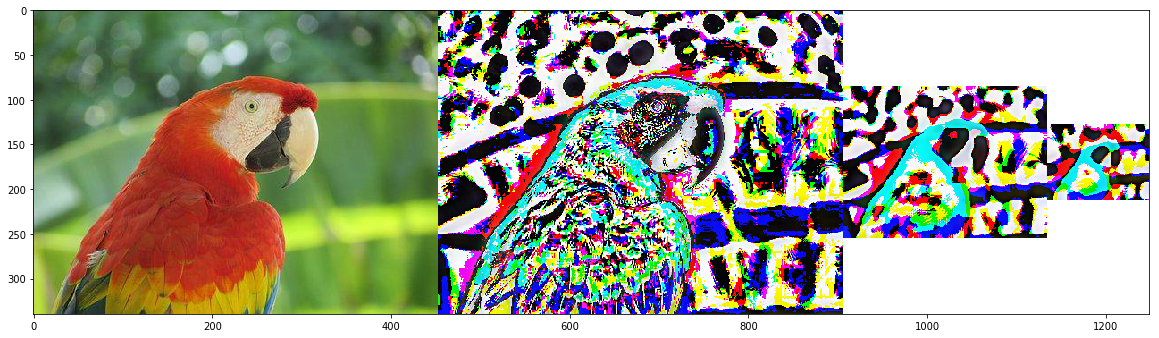

In [0]:
print_image_inline(build_pyarmid_laplace(data, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.7)

### Reconstructing the original images

In [0]:
def reconstruct(input_file, kernel, pyramid_len, output = True):
    
    image_list = []
    
    image = input_file
    
    for i in range(0, pyramid_len):
        
        # we construct the one level above image of the Gaussian image pyramid
        
        gaussian_level_above = down_sample(image, kernel, 1, output = False)
        
        # Next we construct the up sampled image of that one level above Gaussian image
        
        upsampled_gaussian = up_sample(gaussian_level_above, kernel, 1, False)
        
        # We construct the laplacian residual image
        
        image = resize_n_pad(image,upsampled_gaussian)[0]
        upsampled_gaussian = resize_n_pad(image,upsampled_gaussian)[1]
        
        laplacian_image = image - upsampled_gaussian
        
        image = gaussian_level_above
        
        # reconstructed image
        
        reconstructed = laplacian_image + upsampled_gaussian
        
        # To zoom out the images (for printing purposes) we use constant padding of appropriate width
    
        pad_height_top = (input_file.shape[0] - reconstructed.shape[0])//2
        pad_height_bottom = (input_file.shape[0] - reconstructed.shape[0])//2
        pad_width_left = 0
        pad_width_right = 0
        
        padded_im = cv2.copyMakeBorder(reconstructed, pad_height_top, pad_height_bottom, pad_width_left, pad_width_right, cv2.BORDER_CONSTANT, value = (255,255,255))

        
        image_list.append(padded_im)
        
    if output:
        return image_list
    else:
        return reconstructed

In [0]:
def build_pyramid_recon(input_file, kernel, pyramid_len = 3):
    
    # Concatenate the images to build the pyramid using CV2's inbuilt function
    # The function "hconcat_resize_min" concatenates all the images 
    
    def hconcat(im_list, interpolation=cv2.INTER_CUBIC):
        h_min = min(im.shape[0] for im in im_list)
        im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                          for im in im_list]
        return cv2.hconcat(im_list_resize)
    
    image_list = reconstruct(input_file, kernel, pyramid_len)
    
    return hconcat(image_list)

### Reconstructed images of the Gaussian Pyramid

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/parrot.png' )
data = np.array( image )

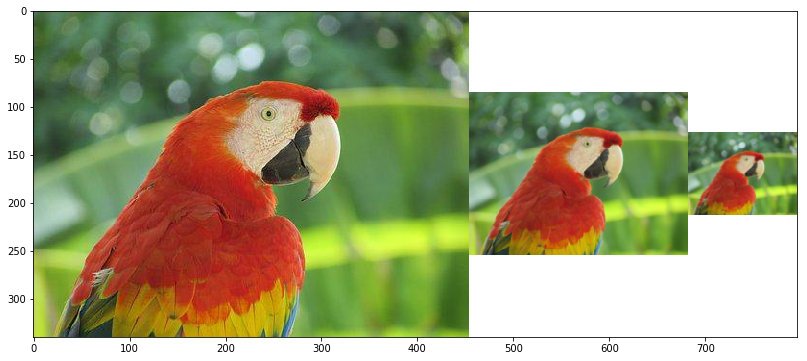

In [0]:
print_image_inline(build_pyramid_recon(data, [1/16,4/16,6/16,4/16,1/16], 3))

### Original Gaussian Pyramid

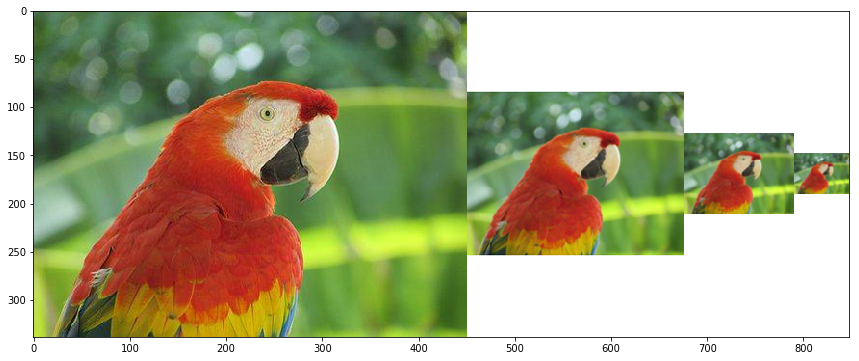

In [0]:
print_image_inline(build_pyarmid(data, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.8)

#### Observations

The reconstructed images for the Gaussian Pyramid are almost identical to those of the original Gaussian Pyramid. We do not observe any difference visually. We take the following example :

In [0]:
image = Image.open( '/media/subhasish/Professional/CMI/Sem_4/CV/assignments/Assignment_2/Images/Images/Pyramids/parrot.png' )
data = np.array( image )

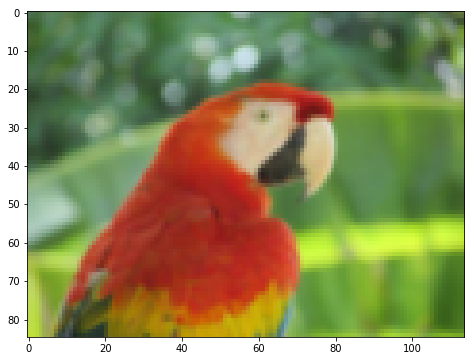

In [0]:
# This is the image obtained in the 2 rd level in the Gaussian Pyramid

print_image_inline(down_sample(data, [1/16,4/16,6/16,4/16,1/16], 2, False))

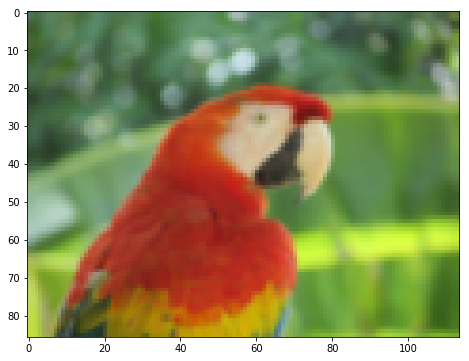

In [0]:
# This is the image which is obtained from the 2 nd level image of the Gaussian pyramid

print_image_inline(reconstruct(data, [1/16,4/16,6/16,4/16,1/16], 3, False))

In [0]:
# Measuring pixle wise intensity difference 

reconstructed_image = reconstruct(data, [1/16,4/16,6/16,4/16,1/16], 3, False)
down_sampled_image = down_sample(data, [1/16,4/16,6/16,4/16,1/16], 2, False)

# resizing the images for nullifying the padding effects

reconstructed_image = resize_n_pad(reconstructed_image,down_sampled_image)[0]
down_sampled_image = resize_n_pad(reconstructed_image,down_sampled_image)[1]

# Computing the pixle wise differences

diff_image = reconstructed_image - down_sampled_image
diff_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Hence we observe that the pixle-wise intensity difference matrix contains only zeros. Which implies that the reconstructed images are exactly identical as that of those in the Gaussain pyramid.

### Extra Credit 

### (Q.1)

In [0]:
# Loading the images

image1 = Image.open( '/home/subhasish/Pictures/i7.jpg' )
im1 = np.array( image1 )

image2 = Image.open( '/home/subhasish/Pictures/i11.jpg' )
im2 = np.array( image2 )

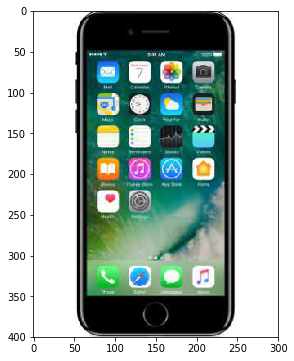

In [0]:
print_image_inline(im1)

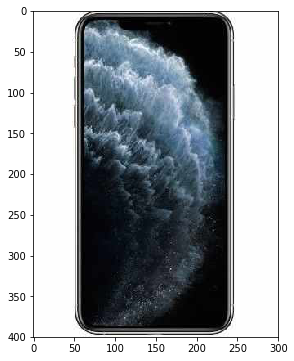

In [0]:
print_image_inline(im2)

In [0]:
# Function for merging the images
# Here we have used the inbuilt package of CV2 "hconcat" to merge the two half images

def combine_n_merge(im1, im2):
    
    n_col = im1.shape[1]//2
    
    im1_left = im1[:, :n_col]
    print("im1_left",im1_left.shape)
    im2_right = im2[:, n_col:]
    print("im1_right",im2_right.shape)
    image_list = [im1_left, im2_right]
    
    return print_image_inline(cv2.hconcat(image_list))
    

im1_left (400, 150, 3)
im1_right (400, 150, 3)


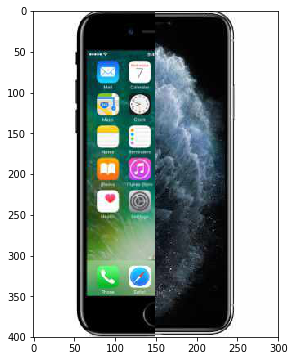

In [0]:
combine_n_merge(im1, im2)

### Laplacian Pyramids for the two images

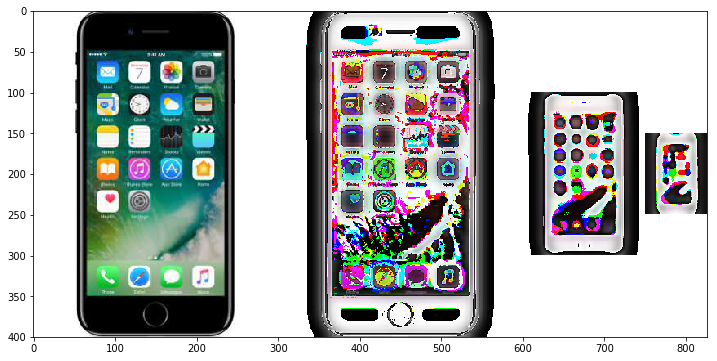

In [0]:
print_image_inline(build_pyarmid_laplace(im1, [1/16,4/16,6/16,4/16,1/16], 3))

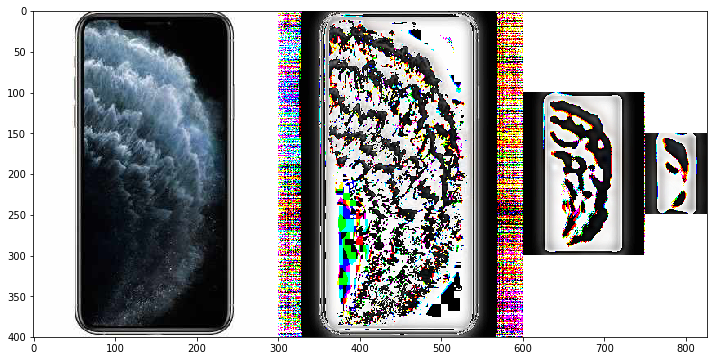

In [0]:
print_image_inline(build_pyarmid_laplace(im2, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.2) Constructing the third Laplacian pyramid LS

In [0]:
# Original shape of the images

im1.shape, im2.shape 

((400, 300, 3), (400, 300, 3))

####  we resize the images to a size such taht the image dimensions be $2^N +1$

In [0]:
# Resizing the images

resized_im1 = cv2.resize(im1, (257, 257)) 
resized_im2 = cv2.resize(im2, (257, 257)) 

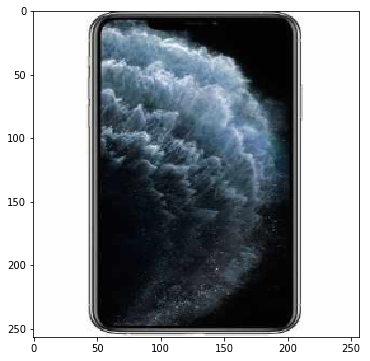

In [0]:
# printing the resized images

print_image_inline(resized_im2)

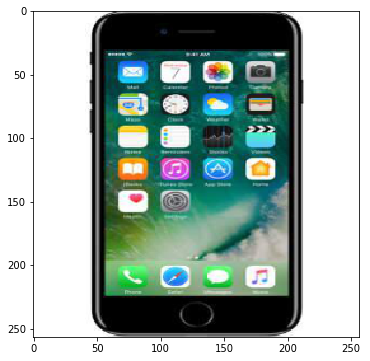

In [0]:
# printing the resized images

print_image_inline(resized_im1)

In [0]:
# Function for merging the images
# Here we have used the inbuilt package of CV2 "hconcat" to merge the two half images

def combine_n_merge(im1, im2):
    
    n_col = im1.shape[1]//2
    
    im1_left = im1[:, :n_col]
    print("im1_left",im1_left.shape)
    
    im2_right = im2[:, n_col+1:]
    print("im1_right",im2_right.shape)
    
    LA = im1[:, n_col:n_col+1]
    LB = im1[:, n_col+1:n_col+2]
    LS = (LA + LA)//2
    
    final = np.concatenate((im1_left, LS, im2_right), axis=1)
    print("Shape of the final image : ", final.shape)
    
    return final
    

im1_left (257, 128, 3)
im1_right (257, 128, 3)
Shape of the final image :  (257, 257, 3)


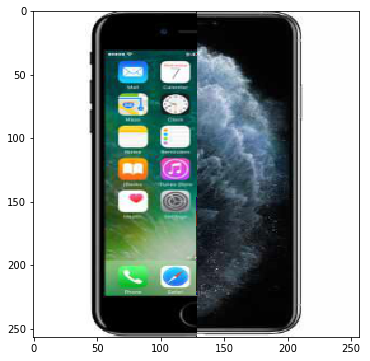

In [0]:
LS = combine_n_merge(resized_im1, resized_im2)
print_image_inline(LS)

###  Creating the new Laplacian image pyramid

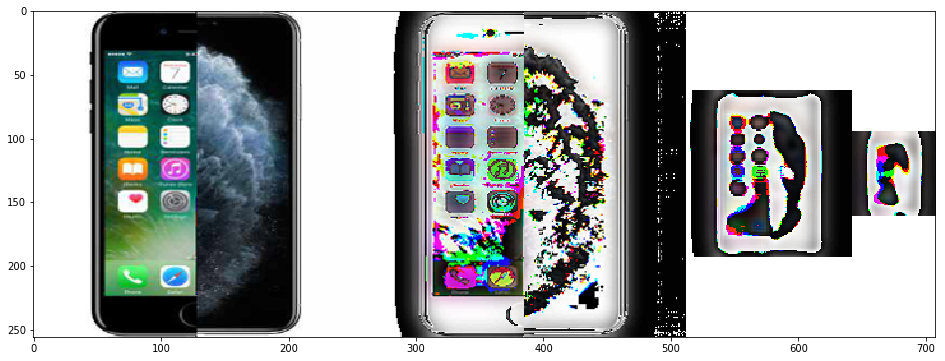

In [0]:
print_image_inline(build_pyarmid_laplace(LS, [1/16,4/16,6/16,4/16,1/16], 3))

### (Q.3) Expanding and summing the images of Laplacian pyramid

In [0]:
# This list contains the images of the Laplacian Pyramid

laplacian_image_1 = laplacian(LS, [1/16,4/16,6/16,4/16,1/16], 1, False)
laplacian_image_2 = laplacian(LS, [1/16,4/16,6/16,4/16,1/16], 2, False)
laplacian_image_3 = laplacian(LS, [1/16,4/16,6/16,4/16,1/16], 3, False)

In [0]:
print("Dimension of first level Laplacian image : ", laplacian_image_1.shape)
print("Dimension of second level Laplacian image : ",laplacian_image_2.shape)
print("Dimension of third level Laplacian image : ",laplacian_image_3.shape)

Dimension of first level Laplacian image :  (258, 258, 3)
Dimension of second level Laplacian image :  (130, 130, 3)
Dimension of third level Laplacian image :  (66, 66, 3)


In [0]:
# Now we expand the laplacian images by using upsampling and padding as necessary

laplacian_image_1_expanded = cv2.copyMakeBorder(laplacian_image_1, 3, 3, 3, 3, cv2.BORDER_REPLICATE, value = (255,255,255))

laplacian_image_2_1 = up_sample(laplacian_image_2, [1/16,4/16,6/16,4/16,1/16], 1, False)
laplacian_image_2_expanded = cv2.copyMakeBorder(laplacian_image_2_1, 2, 2, 2, 2, cv2.BORDER_REPLICATE, value = (255,255,255))

laplacian_image_3_expanded = up_sample(laplacian_image_3, [1/16,4/16,6/16,4/16,1/16], 2, False)

In [0]:
# Priting the dimensions of the expanded Laplacian images 

print("Dimension of first level expanded Laplacian image : ", laplacian_image_1_expanded.shape)
print("Dimension of second level expanded Laplacian image : ",laplacian_image_2_expanded.shape)
print("Dimension of third level expanded Laplacian image : ",laplacian_image_3_expanded.shape)

Dimension of first level expanded Laplacian image :  (264, 264, 3)
Dimension of second level expanded Laplacian image :  (264, 264, 3)
Dimension of third level expanded Laplacian image :  (264, 264, 3)


### We obtain the merged image by expanding and summing the images Laplacian pyramid

In [0]:
merged_image = laplacian_image_1_expanded + laplacian_image_2_expanded + laplacian_image_3_expanded

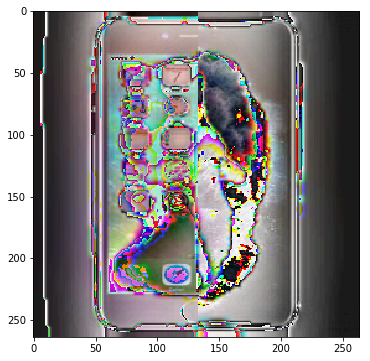

In [0]:
print_image_inline(merged_image)